<a href="https://colab.research.google.com/github/gihuni99/Basic_MLDL/blob/main/Ch04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic Gradient Descent(SGD)

### 점진적인 학습

새롭게 계속 데이터가 추가된다면,
* 기존 데이터와 새로운 데이터를 추가하여 매일 학습(비효율적)
* 이전 데이터를 버리고 새로운 데이터를 추가하여 훈련 데이터의 크기를 일정하게 함(비효율적)

위 두 예시는 모두 앞서 학습시킨 모델을 버리고, 새롭게 모델을 학습시키는 방법이다. 만약 이전에 학습시킨 모델을 버리지 않고, 새로운 데이터에 대해서만 조금씩 학습시킨다면?

훈련에 사용한 데이터를 모두 유지할 필요가 없고, 앞서 학습한 데이터를 모두 적용할 수 있다. 이를 **점진적 학습(Incremental learning)**이라고 한다.

**SGD**는 점진적 학습의 대표적인 알고리즘이다.

_**Stochastic Gradient Descent**_

* **Stochastic**: '확률적'이라는 뜻으로 '랜덤하게'라는 말을 기술적으로 표현한 것
* **Gradient**: 기울기를 의미한다.
* **Descent**: 하강법을 의미한다. 따라서 경사를 따라 내려가는 것을 의미

SGD는 가장 gradient가 큰 곳을 따라 조금씩 내려오는 방법이고, 내려오는 과정이 SGD 모델을 training하는 것이다.

**Stochastic**(확률적)의 의미를 알아보자. Gradient Descent로 가장 가파른 길을 찾는 것은 Train set을 통해 학습하기 때문에, 당연히 Train set을 사용하여 가파른(Gradient가 큰) 길을 찾는 것이다. 이때 전체 sample을 사용하는 것이 아닌, train set에서 random하게 골라서 gradient를 찾는 것이 **Stochastic Gradient Descent**에서 Stochastic의 의미이다.

예를 들어 train set에서 하나의 sample을 선택하여 경사를 조금씩 내려간다고 가정하자. random하게 하나의 sample을 선택하여 경사를 내려가고, 그 후 또 다른 sample을 선택하여 경사를 내려간다. 이렇게 모든 sample을 사용할 때까지 계속한다. 만약 모든 sample을 사용하였음에도 산에서 내려오지 못했다면, **train set**에 다시 모든 sample들을 넣어 random하게 sample을 선택하여 이어서 경사를 내려간다. 이렇게 training을 반복하여 만족할만한 위치에 도달할 때까지 계속 경사를 내려가면 된다.

SGD에서 train set을 한번 모두 사용하는 과정을 **epoch**라고 하고, 일반적으로 Gradient Descent는 수십, 수백번의 epoch을 반복하여 수행한다.

그래도 1개씩 sample을 선택하는 것은 시간이 오래걸린다. 따라서 무작위로 몇개의 sample을 선택하여 경사를 내려가는 방법인 **minibatch gradient descent**방식이 있다.

추가로 모든 sample을 사용하여 경사를 한번 내려가는 방식인 **batch gradient descent**가 있는데, 전체 데이터를 사용하여 training하기 때문에 안정적이지만 컴퓨팅 자원을 많이 사용하게 된다.

지금까지 말하는 가장 빠르게 '산'을 내려가는 방법에서 '산'은 어떤 것을 의미할까? 바로 **Loss Function**을 의미한다.

_**Loss Function(Cost Function)**_

**Loss Function**은 머신러닝 알고리즘이 정확하게 동작하는지 측정하는 기준이다.

만약 sample 4개에 대한 Classification에서 정확도를 측정할 때, 정확도는 0, 0.25, 0.5, 0.75, 1의 5가지가 나온다. 여기에 음수를 취하면 -1.0이 가장 낮고 -0.0이 가장 높다. 이렇게 사용한다면 Loss function으로 적합할까? **아니다** Loss function에서 SGD를 사용할 때, **Gradient**값이 가장 큰 방향으로 경사를 내려가는데 gradient를 구하기 위해서는 함수가 **미분 가능**해야 한다.

_**Logistic Loss Function**_:Classification 모델에서 사용하는 Loss Function

Logistic Regression에서 binary classification을 할 때, 예측은 0 또는 1이지만 확률은 0~1 사이의 어떠한 값도 가질 수 있다.(연속적)

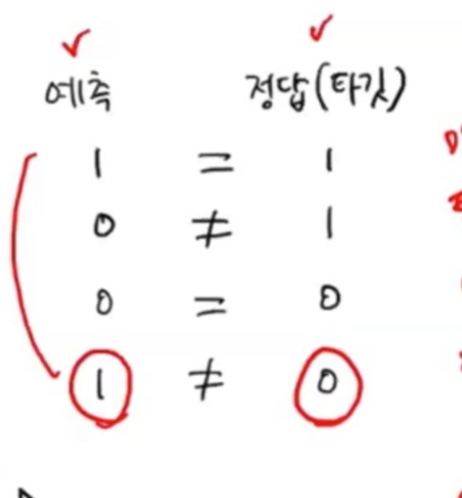

예시로 위의 예측확률(Sigmoid function값)을 각각 0.9, 0.3, 0.2, 0.8이라고 가정해보자. 각 sample들로 loss function을 만들어보겠다.

첫번째 sample의 예측은 0.9이므로 양성 클래스의 타깃인 1과 곱한 다음 음수로 바꿀 수 있다.(이 경우에는 예측이 1에 가까울 수록 정확한 모델, 즉 정답이 1) 예측이 1에 가까울수록 예측과 타깃의 곱의 음수는 점점 작아진다.

두번째 sample의 에측은 0.3이다. target이 '1'인데 distance가 크다. 이 때 Loss function은 -(0.3 x 1) = - 0.3이므로, 첫번째 sample보다 큰 loss가 나온다.

세번째 sample의 예측은 0.2인데, 음성 클래스(0)이 타깃이므로 -(0.2 x 0)을 하는 것이 아니라 -(0.8 x 1)= - 0.8을 해주어 loss가 작은 것을 알 수 있다.

네번째 sample의 예측은 0.8인데, 정답을 맞추지 못하였고 타깃이 '0'이므로 -(0.2 x 1)= -0.2인 큰 loss값이 나온다.

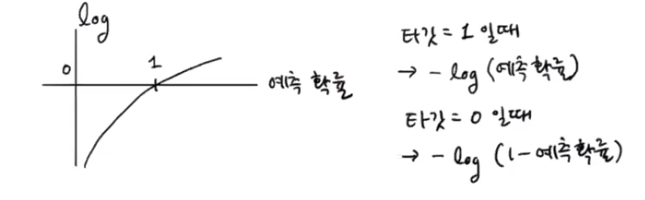

추가적으로 예측확률이 0~1사이의 값이기 때문에 Loss Function을 로그함수로 적용하면 더 좋다. 로그함수는 0에 가까울 수록 큰 음수가 되기 때문에 -log에 예측확률을 적용하면 0에 가까울수록 매우 큰 Loss값을 갖게 된다.(타깃이 0일 때는 1에 가까울 수록 매우 큰 Loss)

위 Loss Function을 **Logistic Loss Function** 또는 ** Binary Cross-entropy Loss Function**이라고 한다.

Binary Classification에서와 비슷하게 **Multiple Classification**에서는 **Cross-entropy Loss Function**을 사용한다.

+) Loss Function은 직접 만드는 경우는 거의 없다(이미 개발되어 있기 때문)

+) Regression에서는 **MSE(Mean Squared Error)**를 Loss Function으로 많이 사용한다.(MSE값이 작을수록 좋은 모델)

### SGDClassifier

이제 SGD를 사용한 Classification 모델을 만들어보자

먼저 fish_csv_data파일을 pandas dataframe으로 변환한다.

In [ ]:
import pandas as pd
fish=pd.read_csv('https://bit.ly/fish_csv_data')

그 후 Species열을 제외한 나머지 5개 열을 input data로 사용한다.

In [ ]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target=fish['Species'].to_numpy()

Scikit-Learn의 train_test_split()함수를 사용해 데이터를 train, test set으로 나눈다.

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

이제 train, test set의 feature(input data)를 standard preprocessing(표준화 전처리)한다.

In [ ]:
from sklearn.preprocessing import StandardScaler #standard score를 만들어주는 클래스
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input) #feature들의 scale을 맞춘 데이터
test_scaled=ss.transform(test_input)

이제 feature들의 scale을 맞춘 numpy배열 train_scaled와 test_scaled가 준비되었다.(이전까지와 동일)

Scikit-Learn에서 SGD를 제공하는 대표적인 Classification 모델은 **SGDClassifier** 클래스이다. SGDClassifier 클래스는 **sklearn.linear_model**패키지 아래 있다.

In [ ]:
from sklearn.linear_model import SGDClassifier

SGDClassifier 객체를 만들 때에는 2개의 parameter를 지정한다.

'**loss**' parameter는 Loss function의 종류를 지정한다.(loss='log_loss'로 지정하여 logistic loss function으로 지정하였다.)

'**max_iter**' parameter는 수행할 epoch의 횟수를 지정한다.(epoch=10으로 지정하였다.)

+ Tip) 만약 Multiple Classification일 경우에 SGDClassifier에 loss='log_loss'를 설정하면 클래스마다 binary classification 모델을 만든다. 예를 들어 'Bream'클래스에서는 'Bream'을 제외한 나머지 모두를 음성 클래스로 두는 방식이다.

In [ ]:
sc=SGDClassifier(loss='log_loss',max_iter=10,random_state=42) #loss='log'도 가능
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

위 결과를 볼 때, 정확도가 낮다. epoch의 횟수가 적은 것으로 보인다.

+ CovergenWarning은 모델이 충분히 수렴되지 않았다는 것을 의미. 따라서 max_iter값을 늘려주는 것이 좋다(오류가 아닌 경고)

우리는 위 경고에 따라 모델의 max_iter를 재설정하여 다시 학습시키는 것이 아니라, SGD의 점진적 학습이 가능하다는 점을 이용하겠다. SGDClassifier의 객체를 새로 만들지 않고, 훈련된 모델 sc를 추가로 training시켜보자. 이 때, 모델을 추가로 학습시키는 method는 **partial_fit()**를 사용한다.

**partial_fit()**:해당 method는 fit()와 사용법은 같지만, 한번 호출할 때마다 **1epoch**씩 이어서 훈련한다.

In [ ]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

위 결과를 통해 정확도가 향상된 것을 볼 수 있다. 따라서 추가적인 epoch을 학습시킬 필요가 있다. 이 때, 언제까지 학습하는 것이 좋을까? 적절한 기준이 필요하다.

+ Tip) SGDClassifier는 train_scaled와 train_target을 전체 전달하여 학습하므로 Batch Gradient Descent인 것이 아니라, 자동으로 1개의 sample을 선택하여 SGD를 수행한다. (SGDClassifier는 mini-batch gradient descent와 batch gradient descent를 제공하지 않는다)

### Epoch와 Over/Underfitting

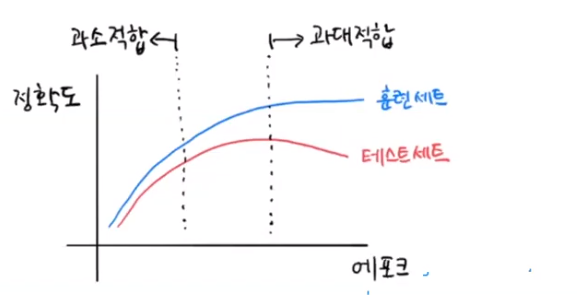

Epoch의 수가 적으면 Underfitting, 과도하게 많으면 Overfitting이 발생한다. epoch이 진행될수록 train set에 대한 score는 꾸준히 증가하지만, 어느 지점부터 test set에 대한 score는 감소한다. 이 지점 이전에(Overfitting이 발생하기 전에) training을 멈추는 것을 **Early Stopping(조기 종료)**라고 한다.

이제 직접 epoch에 따른 accuracy의 그래프를 그려보자.

이번 예제에서는 fit() method를 사용하지 않고, partial_fit() method만 사용하겠다. **partial_fit()** method만을 사용하기 위해서는 train set에 있는 전체 클래스의 label을 partial_fit()에 전달해주어야 한다.

이를 위해 np.unique()함수로 train_target에 있는 7개의 생선 목록을 만든다. 또한 epoch마다 train, test set에 대한 score를 기록하기 위한 2개의 list를 만든다.

In [ ]:
import numpy as np
sc=SGDClassifier(loss='log',random_state=42)
train_score=[] #train set의 score를 기록하기 위한 list
test_score=[] #test set의 score를 기록하기 위한 list
classes=np.unique(train_target) #partial_fit() method에 모든 클래스의 label을 전달하기 위한 list

300번의 epoch동안 훈련을 하여 그래프를 그려보자

In [ ]:
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)#partial_fit() method만 사용하기 위해서 classes 속성에 label전달
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

위 결과를 볼 때, 100epoch이후에는 train set과 test set의 accuracy가 벌어지고 있다. 또한 epoch 초기에는 underfitting이 발생하고 있다. 그래프를 통해 보았을 때, 해당 모델은 100epoch이 가장 적절한 반복횟수로 보인다.

In [ ]:
#SGDClassifier는 일정 epoch이상 성능향상이 없다면 더이상 훈련하지 않고 자동으로 멈춘다.
#따라서 'tol' parameter를 None으로 지정하여 학습을 중단하지 않도록 하였다.
sc=SGDClassifier(loss='log',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

+ Tip) SGDRegressor는 SGD를 사용한 Regression 모델이다.(사용방법은 SGDClassifier와 동일)

+ SGDClassifier의 'loss' parameter의 기본값은 **'hinge'**이다. **hinge(힌지) Loss**는 Support vector machine(SVM)이라 불리는 또 다른 머신러닝 알고리즘을 위한 Loss function이다. 여기에서는 자세히 공부하지 않고, 'hinge'를 사용한 모델을 학습시켜보는 것으로 마무리하겠다.

In [ ]:
sc=SGDClassifier(loss='hinge',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

### 추가공부

**Scikit-Learn**

* **SGDClassifier**: Stochastic Gradient Descent를 사용한 Classification모델을 만드는 클래스이다. **loss** parameter는 loss function을 지정(기본값은 'hinge'), **penalty** parameter는 regularization의 종류를 지정할 수 있음(기본값은 'l2')(regularization의 강도는 **alpha** parameter에서 지정), **max_iter**parameter는 epoch의 횟수를 지정(기본값은 1000), **tol** parameter는 반복을 멈출 조건(**n_iter_no_change**parameter에서 지정한 epoch만큼 loss가 줄어들지 않으면 중단)(tol의 기본값은 0.001, n_iter_no_change의 기본값은 5)

* **SGDRegressor**: SGD를 사용한 Regression 모델을 만드는 클래스이다. **loss** parameter는 loss function을 지정(기본값은 제곱 오차를 나타내는 'squared_loss', 이전에 SGDClassifier에서 설명한 parameter는 모두 SGDRegressor에 동일하게 적용